# Import Libraries

In [229]:
import datetime
import time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

plt.style.use('seaborn')
sns.set(font_scale=2.0)

from sklearn.ensemble import RandomForestRegressor

In [238]:
pd.set_option('display.float_format', '{:,.0f}'.format)

# Load Dataset

In [3]:
df_train = pd.read_csv('data/movies_train.csv')
df_test = pd.read_csv('data/movies_test.csv')

# Explore Dataset

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [5]:
df_train.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,"1,161,602",2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,"220,775",4,343,4,6959083


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [7]:
df_test.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,"300,529",2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,"342,700",4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,"4,206,611",3,419,7


## 결측치 확인

In [8]:
df_train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [9]:
df_test.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

- dir_prev_bfnum 외에는 결측치가 없어 수월하다. 다만, train 데이터의 dir_prev_bfnum은 결측치가 50%를 초과했으므로 추후 drop해야 할 지 검토가 필요하다.

## label 확인 : box_off_num
- Label, 관객 수

## 모든 변수 상관분석

In [241]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
 12  title_length    600 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 61.1+ KB


In [253]:
heatmap_data = df_train[['time','dir_prev_bfnum','dir_prev_num','num_staff','num_actor','title_length','box_off_num']]

In [254]:
heatmap_data.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,title_length,box_off_num
time,1,0,0,1,0,-0,0
dir_prev_bfnum,0,1,0,0,0,-0,0
dir_prev_num,0,0,1,0,0,-0,0
num_staff,1,0,0,1,0,-0,1
num_actor,0,0,0,0,1,0,0
title_length,-0,-0,-0,-0,0,1,-0
box_off_num,0,0,0,1,0,-0,1


<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

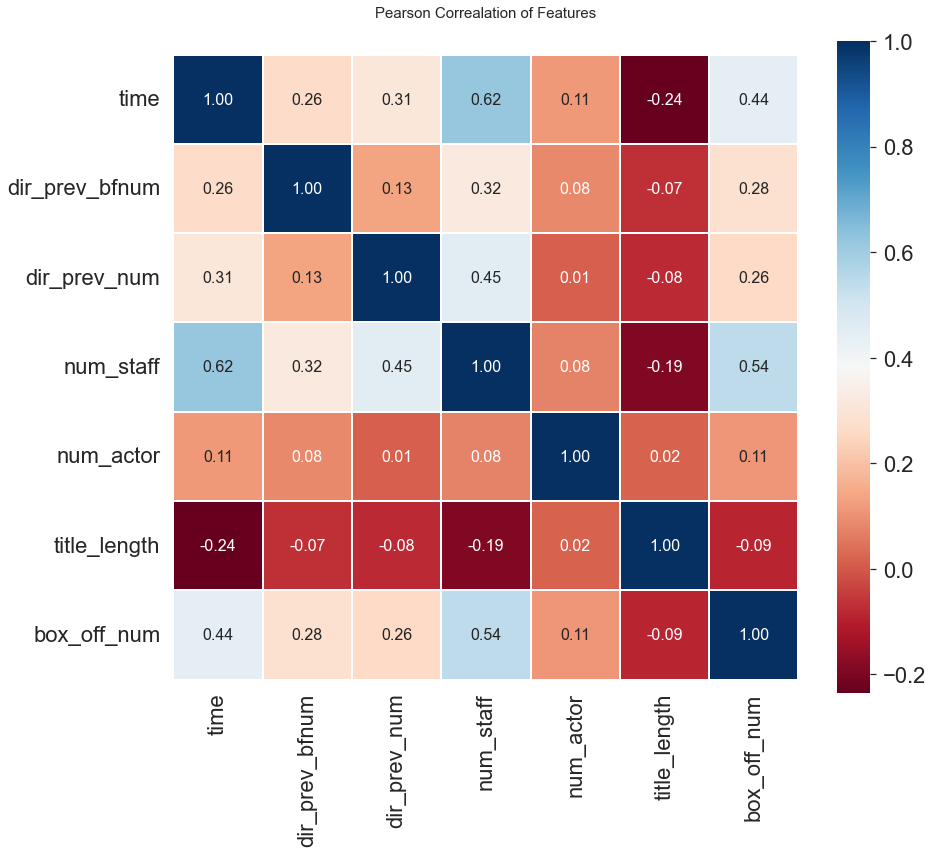

In [255]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))

plt.title('Pearson Correalation of Features', y=1.05, size=15)

sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0
            , square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 16}, fmt='.2f')

## title
- 제목

In [11]:
len(df_train['title'].unique())

600

> 영화 제목은 600개 데이터 포인트가 모두 달라서 drop해야 할 것 같다. 단, 제목에 포함된 단어만으로 그룹핑을 하거나 제목의 길이에 따른 관객 수 차이가 있는지?

In [28]:
# 영화 제목 길이와 관객 수 간의 상관관계 확인해보기

result = []
for i in range(0, 600):
    word_length = len(df_train['title'][i])
    result.append(word_length)

print(result)

[6, 4, 9, 8, 4, 14, 4, 3, 15, 5, 6, 5, 2, 1, 7, 6, 2, 8, 2, 3, 9, 11, 2, 6, 6, 2, 6, 17, 3, 16, 6, 4, 6, 7, 6, 8, 6, 3, 8, 4, 8, 5, 6, 17, 4, 8, 5, 7, 3, 26, 2, 3, 24, 12, 2, 7, 3, 7, 7, 4, 27, 4, 4, 2, 11, 4, 3, 10, 20, 7, 8, 9, 6, 17, 3, 13, 7, 3, 7, 5, 2, 6, 2, 4, 5, 6, 3, 4, 13, 3, 4, 3, 18, 7, 6, 2, 3, 3, 6, 8, 3, 2, 2, 7, 3, 2, 1, 9, 5, 5, 3, 2, 18, 8, 3, 4, 6, 14, 7, 4, 8, 3, 3, 10, 2, 17, 7, 6, 17, 3, 20, 3, 6, 2, 4, 7, 8, 6, 2, 3, 5, 15, 6, 2, 12, 5, 2, 5, 5, 1, 7, 14, 2, 6, 11, 4, 7, 2, 5, 22, 4, 5, 2, 8, 11, 5, 3, 9, 2, 6, 4, 16, 2, 8, 9, 9, 8, 3, 16, 3, 10, 4, 2, 17, 4, 4, 3, 8, 12, 3, 6, 21, 4, 4, 4, 12, 8, 2, 15, 9, 4, 7, 8, 8, 19, 8, 8, 15, 2, 2, 4, 9, 5, 4, 4, 9, 6, 2, 6, 8, 3, 2, 2, 3, 10, 4, 7, 8, 2, 9, 6, 13, 8, 11, 4, 9, 7, 2, 5, 14, 6, 7, 5, 4, 9, 7, 2, 7, 9, 2, 8, 2, 9, 5, 3, 9, 5, 6, 3, 3, 13, 3, 11, 7, 10, 16, 8, 15, 7, 2, 7, 9, 4, 3, 6, 7, 2, 12, 2, 3, 10, 6, 2, 5, 7, 12, 4, 9, 2, 8, 7, 3, 8, 2, 5, 6, 3, 10, 4, 4, 6, 10, 8, 2, 9, 10, 8, 8, 3, 6, 6, 17, 1, 11, 1

In [13]:
df_train['title_length'] = result
df_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,title_length
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,6
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,"1,161,602",2,387,3,7072501,4
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,"220,775",4,343,4,6959083,9
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,"23,894",2,20,6,217866,8
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1,1,251,2,483387,4


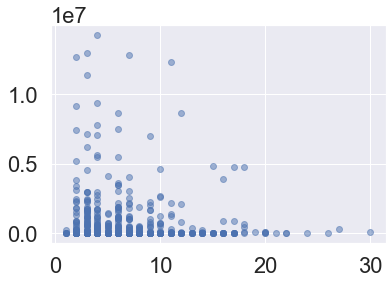

In [14]:
plt.scatter(x=df_train['title_length'], y=df_train['box_off_num'], alpha=0.5)

In [15]:
# 상관분석 결과 -0.08로 아무런 의미가 없다는 것을 알 수 있다.
title_box_corr = df_train[['title_length','box_off_num']].corr(method='pearson')
title_box_corr

,title_length,box_off_num
title_length,1,-0
box_off_num,-0,1


<AxesSubplot:>

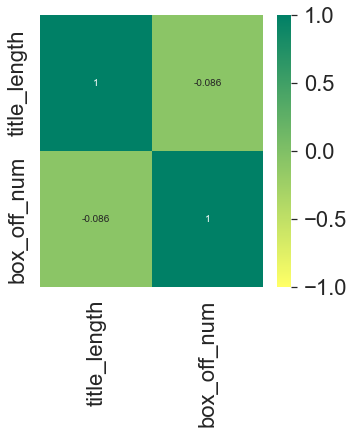

In [16]:
# 그래도 굳이 시각화를 해 보자면..
f, ax = plt.subplots(1, 1, figsize=(5, 5))

sns.heatmap(title_box_corr,
           annot = True,
           cmap = 'summer_r', 
           vmin = -1, vmax=1)

- 영화 제목은 문장이 아니기 때문에 감성 분석을 해도 의미가 없을 것 같다. 결론은 Drop

## distributor
- 배급사

In [30]:
# unique를 찍어보면 역시나 엄청 많다
df_train['distributor'].unique()

array(['롯데엔터테인먼트', '(주)쇼박스', '(주)NEW', '쇼박스(주)미디어플렉스', '백두대간',
       '유니버설픽쳐스인터내셔널코리아', '(주)두타연', '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이',
       '(주)팝 파트너스', 'CJ E&M 영화부문', '(주) 영화제작전원사', 'CJ E&M Pictures',
       'CGV 무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ 엔터테인먼트', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사 진진', '(주)레인보우 팩토리', '김기덕 필름', 'NEW', 'CJ CGV',
       '동국대학교 충무로영상제작센터', 'BoXoo 엔터테인먼트', '(주)마운틴픽쳐스', 'CGV 아트하우스',
       '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21', '디 씨드', '드림팩트 엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아', '(주)예지림 엔터테인먼트', '(주) 영화사조제',
       '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트', '(주)패스파인더씨앤씨', '(주)대명문화공장',
       '(주)온비즈넷', 'KT&G 상상마당', '무비꼴라쥬', '인벤트 디', '씨네그루(주)키다리이엔티',
       '스튜디오후크', '시네마 달', '나이너스엔터테인먼트(주)', 'THE 픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션 픽처스', '(주)이스트스카이필름', '필라멘트 픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴 픽처스', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       '(주)더픽쳐스', '오퍼스픽쳐스'

In [18]:
len(df_train['distributor'].unique())

169

- 배급사는 169개가 있으므로, title과 달리 배급사와 영화는 일대다 관계인 것이다.
- 즉, 어떤 배급사에서는 많은 영화를 배급했을 것이고, 이는 배급사의 영향력, 회사 규모와 관련이 있을 것이다.
- 배급한 영화 수가 많은 경우 해당 영화의 영화관을 더 많이 확보했을 가능성이 높으므로, 관객 수와 비례 관계가 있을 것으로 가정할 수 있겠다.

In [19]:
# 배급사별 영화 수 확인
df_train.groupby('distributor')['box_off_num'].sum().sort_values(ascending=False)

distributor
CJ 엔터테인먼트          116788093
(주)쇼박스              88053064
(주)NEW              65532145
롯데엔터테인먼트            64383745
CJ E&M Pictures      8244674
                     ...    
나우콘텐츠                     54
위드시네마                     46
사람과 사람들                   42
고구마공작소                     8
인피니티엔터테인먼트                 2
Name: box_off_num, Length: 169, dtype: int64

In [20]:
df_train_distributor = pd.DataFrame(df_train.groupby('distributor')['box_off_num'].sum().sort_values(ascending=False))
df_train_distributor

,box_off_num
distributor,
CJ 엔터테인먼트,116788093
(주)쇼박스,88053064
(주)NEW,65532145
롯데엔터테인먼트,64383745
CJ E&M Pictures,8244674
...,...
나우콘텐츠,54
위드시네마,46
사람과 사람들,42


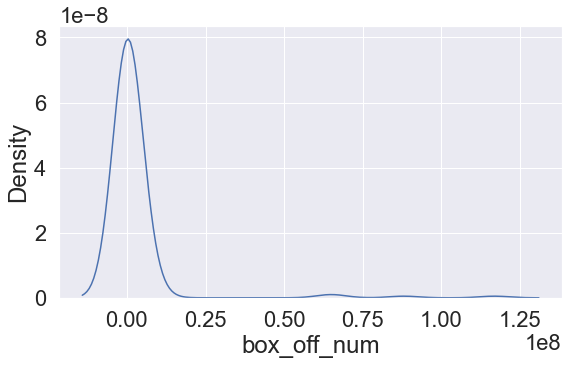

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

sns.kdeplot(df_train_distributor['box_off_num'], ax=ax)

plt.show()

- 대략 25% 이내에 몰려 있는 것 같다

In [22]:
df_train_distributor.describe()

,box_off_num
count,169
mean,"2,514,255"
std,"13,178,943"
min,2
25%,"1,351"
50%,"10,795"
75%,"126,416"
max,"116,788,093"


In [23]:
df_train_distributor.iloc[0:30]

,box_off_num
distributor,
CJ 엔터테인먼트,116788093
(주)쇼박스,88053064
(주)NEW,65532145
롯데엔터테인먼트,64383745
CJ E&M Pictures,8244674
NEW,8152133
CJ E&M 영화부문,7515928
CGV아트하우스,6590943
시네마서비스,5381059


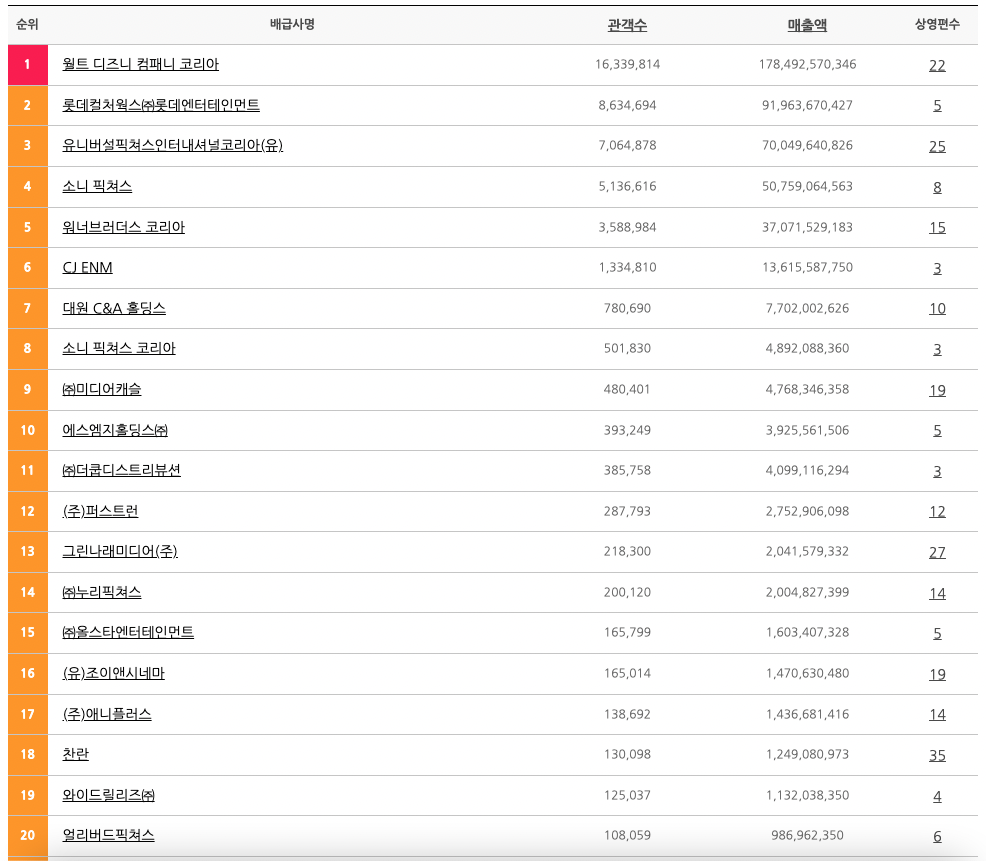

In [24]:
# 국내 배급사 매출 순위와 일치하는지 확인해보자
# http://www.cine21.com/rank/boxoffice/company/?cs_type=distributor
# 씨네21에서 2022-12-22 기준 1년 MAT로 확인해 본 배급사 순위는 아래와 같다.
Image('distributor_ranking_22-12.png')

- 데이터에서는 CJ엔터테인먼트, 쇼박스, NEW, 롯데엔터테인먼트가 역시 압도적인데, 실제 최근 순위와는 조금 차이가 있긴 하다.
- 아무튼 전처리 시에는 상위 4개, 100만~1000만 사이, 100만 미만 정도로 구분하면 되겠다.

## genre
- 장르
- 장르는 취향의 차이이므로 관객 수와의 상관관계는 낮을 것으로 생각된다.
- 다만, 액션이나 드라마 같은 장르는 비교적 대중적이므로 스릴러와 같은 장르에 비해서는 더 인기가 있을 것으로 생각된다.

In [25]:
df_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,title_length
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,6
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,"1,161,602",2,387,3,7072501,4
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,"220,775",4,343,4,6959083,9
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,"23,894",2,20,6,217866,8
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1,1,251,2,483387,4


In [26]:
df_train['genre'].unique()

array(['액션', '느와르', '코미디', '다큐멘터리', '뮤지컬', '드라마', '멜로/로맨스', '공포', '서스펜스',
       '애니메이션', '미스터리', 'SF'], dtype=object)

- 대략 다 다른 것 같아 보이긴 한다만, 공포, 서스펜스 같은 장르는 비슷해서 묶을 수 있을 것 같다.
- 일단 데이터 포인트 갯수를 확인해 보자.

In [27]:
df_train['genre'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

- 미스터리, SF, 뮤지컬, 서스펜스는 데이터 갯수가 적다.
- 액션과 느와르는 같이 묶어도 될 것 같다.
- 영화라는 예술 관점에서 봤을 때는 모든 장르가 하나하나 뚜렷한 특색을 가진다. 하지만 우리가 예측하려는 label은 '영화 관객 수'인데, 관객들은 영화를 볼 때 그렇게까지 세분화해서 장르를 구분하지 않을 것 같다. 영화를 보러 가는 이유와 TPO를 고려하여 비슷한 것끼리 묶어도 될 것 같다. 물론, 모두 다르게 했을 때와 묶었을 때 점수를 확인해봐야 하겠다.

## release_time
- 개봉일
- 영화 흥행에 개봉 일정은 매우 중요한 요소이다. 이 데이터에서 개봉일이 어떤 계절성을 가지는지 알아보자.

In [ ]:
df_train.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,title_length
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,6
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,"1,161,602",2,387,3,7072501,4
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,"220,775",4,343,4,6959083,9


In [31]:
df_train_time = df_train[['release_time','box_off_num']].set_index('release_time').sort_index()
df_train_time

,box_off_num
release_time,
2010-01-02,353
2010-01-14,791
2010-01-14,143458
2010-01-14,27083
2010-01-14,155281
...,...
2015-12-17,1599
2015-12-24,329
2015-12-30,627586


<AxesSubplot:xlabel='release_time'>

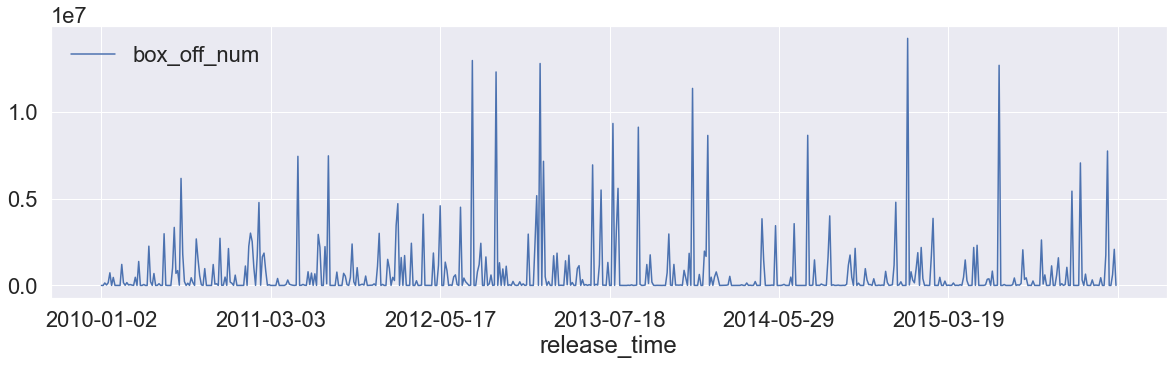

In [32]:
df_train_time.plot(figsize=(20, 5))

- 이렇게 일자별로 보니 알 수가 없다. 월별로 묶어 보자

In [36]:
df_train_time['datetime'] = pd.to_datetime(df_train_time.index)
df_train_time['year'] = df_train_time['datetime'].dt.year
df_train_time['month'] = df_train_time['datetime'].dt.month
df_train_time['day'] = df_train_time['datetime'].dt.day_name()
df_train_time['yearmonth'] = df_train_time['datetime'].dt.to_period('M')
df_train_time

,box_off_num,datetime,year,month,day,yearmonth
release_time,,,,,,
2010-01-02,353,2010-01-02,2010,1,Saturday,2010-01
2010-01-14,791,2010-01-14,2010,1,Thursday,2010-01
2010-01-14,143458,2010-01-14,2010,1,Thursday,2010-01
2010-01-14,27083,2010-01-14,2010,1,Thursday,2010-01
2010-01-14,155281,2010-01-14,2010,1,Thursday,2010-01
...,...,...,...,...,...,...
2015-12-17,1599,2015-12-17,2015,12,Thursday,2015-12
2015-12-24,329,2015-12-24,2015,12,Thursday,2015-12
2015-12-30,627586,2015-12-30,2015,12,Wednesday,2015-12


In [54]:
# 연도 테이블
df_year = df_train_time.groupby('year')[['box_off_num']].sum().reset_index()
df_year

,year,box_off_num
0,2010,48749235
1,2011,50309371
2,2012,83223817
3,2013,95698992
4,2014,75423331
5,2015,71504305


In [111]:
# 월별 테이블
df_yearmonth = df_train_time.groupby(['yearmonth','year','month'])[['box_off_num']].sum().reset_index()
df_yearmonth

,yearmonth,year,month,box_off_num
0,2010-01,2010,1,1520657
1,2010-02,2010,2,10232
2,2010-03,2010,3,1548312
3,2010-04,2010,4,1964416
4,2010-05,2010,5,3357253
...,...,...,...,...
67,2015-08,2015,8,3054825
68,2015-09,2015,9,4028216
69,2015-10,2015,10,4564507
70,2015-11,2015,11,13513754


In [112]:
df_yearmonth[df_yearmonth['year'] == 2010]

,yearmonth,year,month,box_off_num
0,2010-01,2010,1,1520657
1,2010-02,2010,2,10232
2,2010-03,2010,3,1548312
3,2010-04,2010,4,1964416
4,2010-05,2010,5,3357253
5,2010-06,2010,6,2998743
6,2010-07,2010,7,5933593
7,2010-08,2010,8,8352713
8,2010-09,2010,9,6434789
9,2010-10,2010,10,4112059


In [86]:
# 요일별 테이블
df_day = df_train_time.groupby('day')[['box_off_num']].sum().reset_index()
df_day = df_day.reindex([1, 4, 5, 3, 0, 2], axis='index')
df_day

,day,box_off_num
1,Monday,1736
4,Tuesday,5183138
5,Wednesday,239433802
3,Thursday,180192720
0,Friday,97302
2,Saturday,353


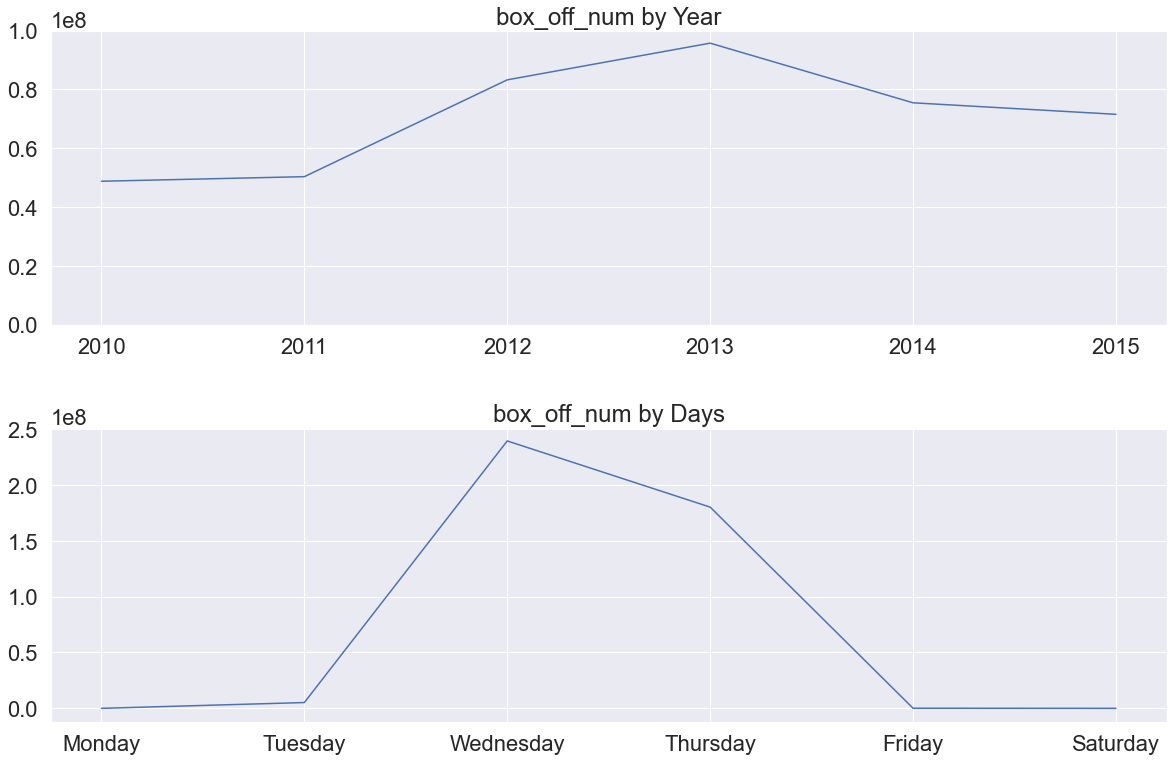

In [98]:
# year, day 시각화
fig, ax = plt.subplots(2, 1, figsize=(20, 12))

ax[0].plot(df_year['year'], df_year['box_off_num'])
ax[0].set_title('box_off_num by Year')
ax[0].set_ylim(0,100000000)

ax[1].plot(df_day['day'], df_day['box_off_num'])
ax[1].set_title('box_off_num by Days')

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)

plt.show()

- 연도별로 계절성이 확연히 드러난다. 2013년에 정점을 찍고 2014년에 급격히 감소, 2015년까지 완만하게 감소하는 추세이므로 이를 반영할 수 있겠다. 다만, 이는 경제 환경과 영화 산업 등 외부 요인에 따른 가능성이 높으므로 앞으로의 영화 관객 수를 예측하는데는 크게 도움이 되지 않을 수 있다.
- 요일별로는 확연히 차이가 나므로, 개봉일에 따라 영화 관객 수를 예측하는 데 도움이 될 것이다.

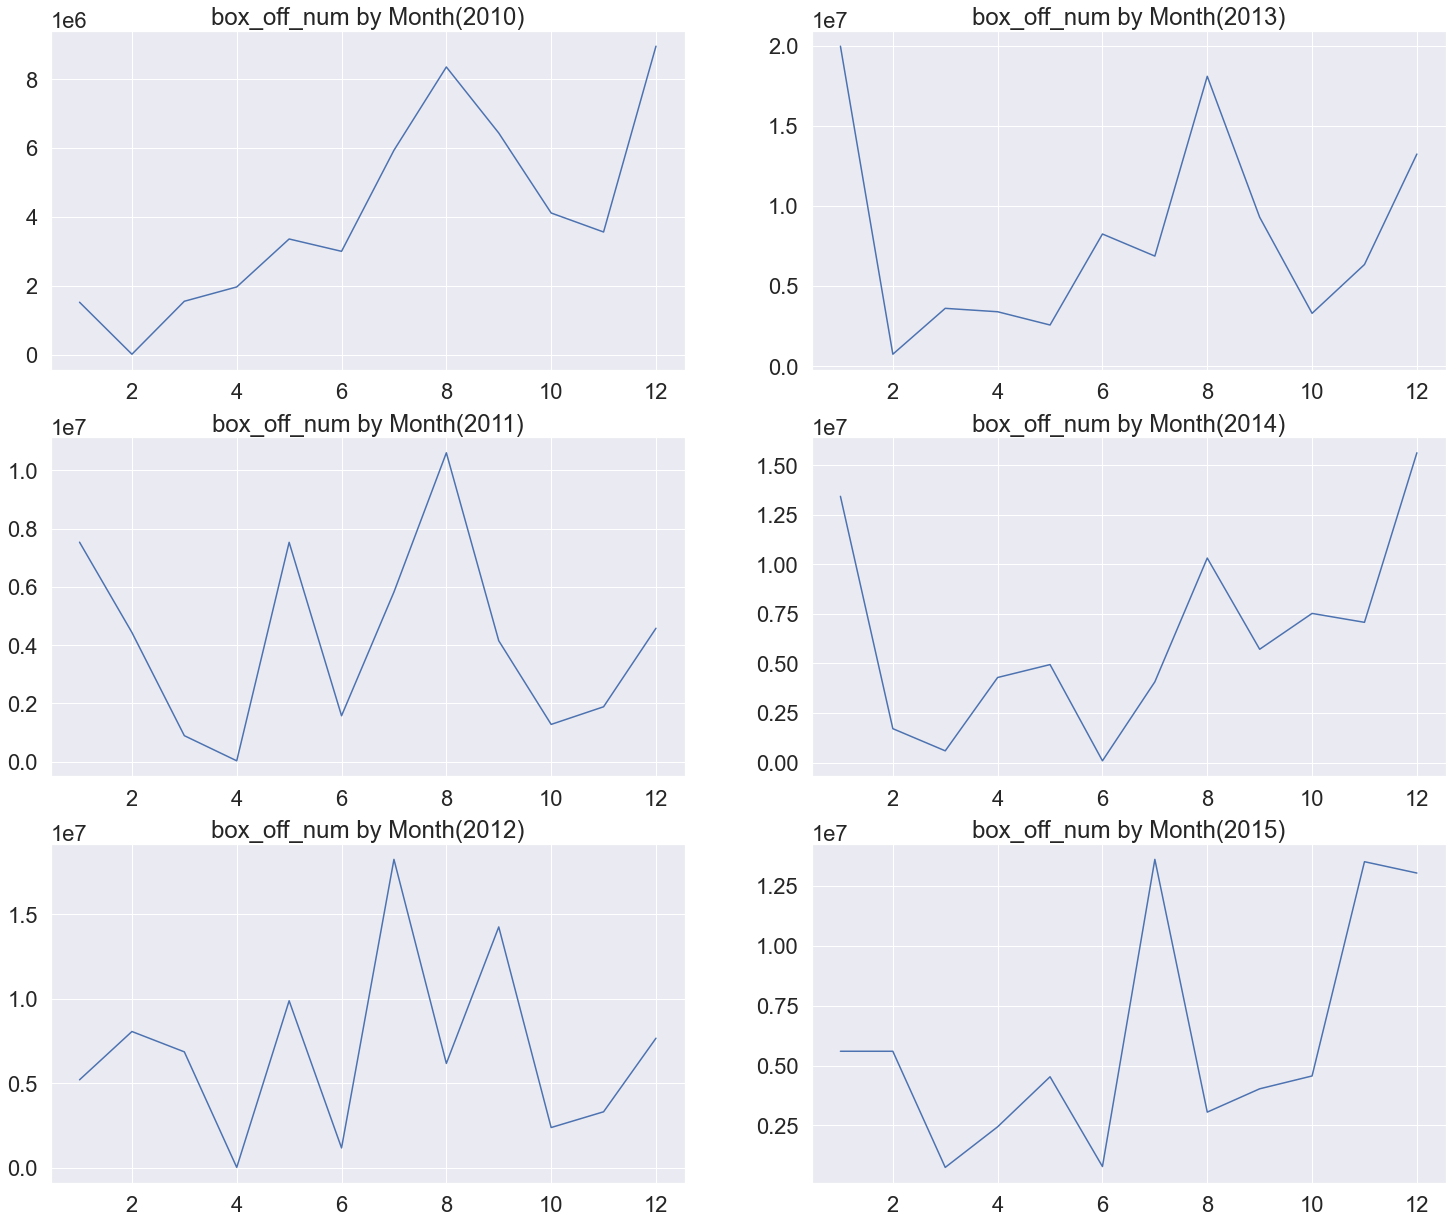

In [161]:
# yearmonth 시각화
fig, ax = plt.subplots(3, 2, figsize=(25, 20))

ax[0,0].plot(df_yearmonth[df_yearmonth['year'] == 2010]['month'], df_yearmonth[df_yearmonth['year'] == 2010]['box_off_num'])
ax[0,0].set_title('box_off_num by Month(2010)')

ax[1,0].plot(df_yearmonth[df_yearmonth['year'] == 2011]['month'], df_yearmonth[df_yearmonth['year'] == 2011]['box_off_num'])
ax[1,0].set_title('box_off_num by Month(2011)')

ax[2,0].plot(df_yearmonth[df_yearmonth['year'] == 2012]['month'], df_yearmonth[df_yearmonth['year'] == 2012]['box_off_num'])
ax[2,0].set_title('box_off_num by Month(2012)')

ax[0,1].plot(df_yearmonth[df_yearmonth['year'] == 2013]['month'], df_yearmonth[df_yearmonth['year'] == 2013]['box_off_num'])
ax[0,1].set_title('box_off_num by Month(2013)')

ax[1,1].plot(df_yearmonth[df_yearmonth['year'] == 2014]['month'], df_yearmonth[df_yearmonth['year'] == 2014]['box_off_num'])
ax[1,1].set_title('box_off_num by Month(2014)')

ax[2,1].plot(df_yearmonth[df_yearmonth['year'] == 2015]['month'], df_yearmonth[df_yearmonth['year'] == 2015]['box_off_num'])
ax[2,1].set_title('box_off_num by Month(2015)')

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

plt.show()

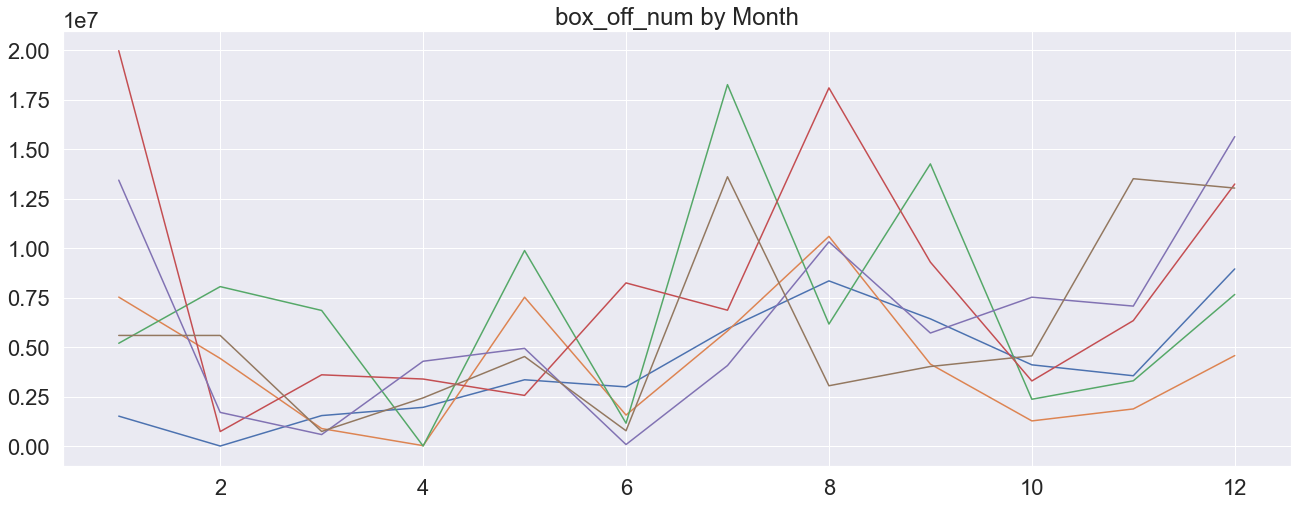

In [162]:
fig, ax = plt.subplots(1, 1, figsize=(22, 8))

for i in range(2010, 2016):
    plt.plot(df_yearmonth[df_yearmonth['year'] == i]['month'], df_yearmonth[df_yearmonth['year'] == i]['box_off_num'])

plt.title('box_off_num by Month')

plt.show()

- 월별로 봤을 때는, 연도별로 다르긴 하지만 12~1월, 7~9월에 높은 것으로 나타난다.

## time
- 상영시간 (분)
- 상영시간은 분포에 따라 1분 단위로 달라진다기보다는, 심리적 저항선에 따라 달라질 것 같다.
- 가정: 상영시간은 120분을 기준을 초과하는 경우 관객 수가 비교적 적고, 100~120분일 떄 가장 많으며, 100분 미만이면 적을 것 같다.

In [137]:
df_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,title_length
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,6
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,"1,161,602",2,387,3,7072501,4
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,"220,775",4,343,4,6959083,9
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,"23,894",2,20,6,217866,8
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1,1,251,2,483387,4


In [179]:
df_train_time = df_train[['time','box_off_num']].sort_values('time').reset_index(drop=True)
df_train_time

,time,box_off_num
0,45,2919
1,60,328
2,61,71
3,61,188
4,62,152
...,...,...
595,153,1744585
596,156,2260512
597,163,3350311
598,166,4398


In [180]:
df_train_time.describe()

,time,box_off_num
count,600,600
mean,101,"708,182"
std,18,"1,828,006"
min,45,1
25%,89,"1,297"
50%,100,"12,591"
75%,114,"479,887"
max,180,"14,262,766"


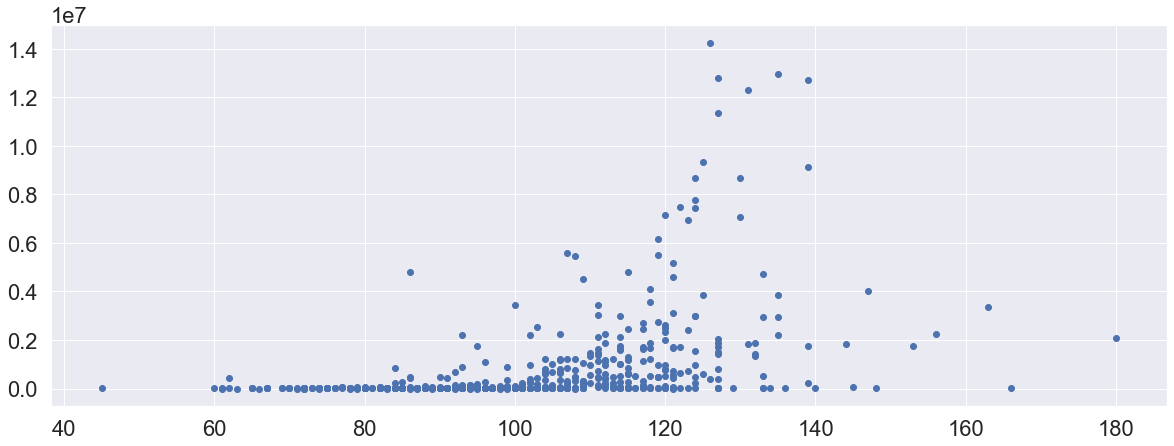

In [181]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))

plt.scatter(df_train_time['time'], df_train_time['box_off_num'])

plt.show()

- 사실 box_off_num의 분포 자체가 너무 커서 애매하지만, 120~140분 사이의 영화가 많은 관객수를 모은 것을 볼 수 있다.
- 140분 이상은 데이터 수 자체가 너무 적고 대부분 100~120분 사이다.

In [197]:
# 100분 이하인 것들만 확인
df_train_time[df_train_time['time'] < 100]

,time,box_off_num,time_en
0,45,2919,하
1,60,328,하
2,61,71,하
3,61,188,하
4,62,152,하
...,...,...,...
293,99,600,하
294,99,542,하
295,99,13190,하
296,99,339,하


In [189]:
# 함수 구현
def time_set(x):
    if x < 100:
        return '하'
    elif x < 121:
        return '중'
    elif x < 141:
        return '상'
    else:
        return '하'

In [190]:
df_train_time['time_en'] = df_train_time['time'].apply(time_set)

In [215]:
pd.pivot_table(df_train_time[['time_en','box_off_num']], index='time_en', aggfunc=['count','sum'])

,count,sum
,box_off_num,box_off_num
time_en,,
상,71,222113795
중,222,167591302
하,307,35203954


## screening_rat
- 상영등급

In [213]:
pd.pivot_table(df_train[['screening_rat','box_off_num']], index=['screening_rat'], aggfunc=['count','sum'])

,count,sum
,box_off_num,box_off_num
screening_rat,,
12세 관람가,102,86188052
15세 관람가,202,251998766
전체 관람가,92,12429242
청소년 관람불가,204,74292991


- 그대로 둬도 크게 상관없을 것 같다

## director, dir_prev_bfnum, dir_prev_num
- director: 감독 이름
- dir_prev_bfnum: 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수 (단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num: 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수 (단 관객수가 알려지지 않은 영화 제외)
- [가정]
- 감독 이름만으로는 크게 의미가 없어 보이고, 이전 관객 수와 영화의 개수와 연관지어 알아보자.
- 메이저, 준메이저 등으로 구분지을 수 있을까?

In [320]:
# 앞서 dir_prev_bfnum 변수에는 결측치가 많은 것을 확인했었다. 과연 이 독립변수는 drop해야 할까?
# 왜 null값인지 확인해 보자.
print('dir_prev_bfnum의 결측률:', df_train['dir_prev_bfnum'].isnull().sum() / len(df_train['dir_prev_bfnum']))

dir_prev_bfnum의 결측률: 0.55


In [327]:
df_train[(df_train['dir_prev_bfnum'].isnull()) & (df_train['dir_prev_num'] == 0)]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,title_length
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,6
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526,4
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778,15
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868,5
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132,10
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958,8
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475,5
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525,6


- null값인 데이터의 dir_prev_num, 즉 이전에 참여한 영화의 갯수 자체가 0인 것을 알 수 있다.
- 일반적으로 측정되거나 조사된 값에서 55%가 비어 있다면 유의미한 데이터라고 보기는 어려울 것이다.
- 하지만, 해당 변수는 감독이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수로, 이전에 영화 제작에 참여하지 않은 신인 감독의 경우 당연히 0이 나오게 될 것이다.
- 따라서 관객 수 자체를 숫자로 변수로 넣으면 신인 감독에게 너무 불리하므로, 적절히 구간을 나누어 변수로 만들어보자.

In [233]:
heatmap_data = df_train[['box_off_num','dir_prev_bfnum','dir_prev_num']]

In [236]:
heatmap_data.corr()

,box_off_num,dir_prev_bfnum,dir_prev_num
box_off_num,1,0,0
dir_prev_bfnum,0,1,0
dir_prev_num,0,0,1


<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

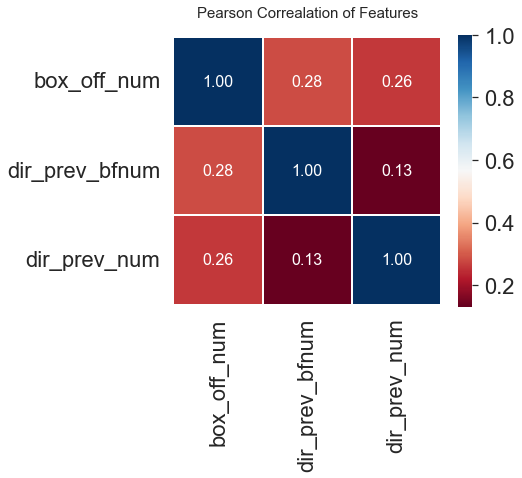

In [240]:
colormap = plt.cm.RdBu
plt.figure(figsize=(6, 5))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0
            , square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 16}, fmt='.2f')

In [286]:
# 한 명의 감독이 많으면 7개의 영화에 참여했다.
df_train['director'].value_counts()

홍상수           7
장률            4
신재호           4
우민호           4
노진수           4
             ..
권오광           1
한윤선           1
박찬경           1
New Pistol    1
백운학           1
Name: director, Length: 472, dtype: int64

In [302]:
df_train_dir = df_train.groupby('director', as_index=False)['dir_prev_bfnum','dir_prev_num'] \
                .sum().sort_values(by='dir_prev_bfnum', ascending=False).reset_index(drop=True)
df_train_dir

/var/folders/j_/fj1wv97j4b12z2k4j128hn5w0000gn/T/ipykernel_12503/1588987934.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_train_dir = df_train.groupby('director', as_index=False)['dir_prev_bfnum','dir_prev_num'] \


,director,dir_prev_bfnum,dir_prev_num
0,고구마,"17,615,314",1
1,강형철,"16,061,870",3
2,김민석,"8,801,639",2
3,심형래,"7,855,474",1
4,김상진,"7,815,569",8
...,...,...,...
467,백승화,0,0
468,백승기,0,0
469,백동훈,0,0
470,배창호,0,0


In [303]:
df_train_dir.describe()

,dir_prev_bfnum,dir_prev_num
count,472,472
mean,"600,889",1
std,"1,669,276",2
min,0,0
25%,0,0
50%,0,0
75%,"469,236",2
max,"17,615,314",9


In [304]:
df_train_dir[df_train_dir['dir_prev_bfnum'] > 0]

,director,dir_prev_bfnum,dir_prev_num
0,고구마,"17,615,314",1
1,강형철,"16,061,870",3
2,김민석,"8,801,639",2
3,심형래,"7,855,474",1
4,김상진,"7,815,569",8
...,...,...,...
217,배형준,19,2
218,주경중,17,1
219,정용주,8,1
220,이성은,7,1


In [305]:
df_train_dir[df_train_dir['dir_prev_bfnum'] > 0].describe()

,dir_prev_bfnum,dir_prev_num
count,222,222
mean,"1,277,566",2
std,"2,251,710",2
min,1,1
25%,"20,853",1
50%,"511,867",2
75%,"1,523,155",3
max,"17,615,314",9


- 영화감독이 신인인지, 아마추어인지, 프로인지, 거장인지 나누어 보자

In [306]:
# 함수 구현
def director_set(x):
    if x == 0:
        return '신인'
    elif x < 511867:
        return '아마추어'
    elif x < 1523155:
        return '프로'
    else:
        return '거장'

In [310]:
df_train_dir['director_en'] = df_train_dir['dir_prev_bfnum'].apply(director_set)

In [311]:
df_train_dir

,director,dir_prev_bfnum,dir_prev_num,director_en
0,고구마,"17,615,314",1,거장
1,강형철,"16,061,870",3,거장
2,김민석,"8,801,639",2,거장
3,심형래,"7,855,474",1,거장
4,김상진,"7,815,569",8,거장
...,...,...,...,...
467,백승화,0,0,신인
468,백승기,0,0,신인
469,백동훈,0,0,신인
470,배창호,0,0,신인


## num_staff
- 스태프 수
- 스태프 수가 많을수록 제작비가 많이 들어갔다는 의미이니, 관객을 많이 모을 확률이 높은걸까?
- 완전히 선형이라기보다는, 스태프 수에 따라 소형, 중형, 대형으로 나누어 보자

In [259]:
df_train_staff = df_train[['num_staff','box_off_num']]
df_train_staff

,num_staff,box_off_num
0,91,23398
1,387,7072501
2,343,6959083
3,20,217866
4,251,483387
...,...,...
595,510,1475091
596,286,1716438
597,123,2475
598,431,2192525


In [261]:
df_train_staff.describe()

,num_staff,box_off_num
count,600,600
mean,151,"708,182"
std,166,"1,828,006"
min,0,1
25%,17,"1,297"
50%,82,"12,591"
75%,264,"479,887"
max,869,"14,262,766"


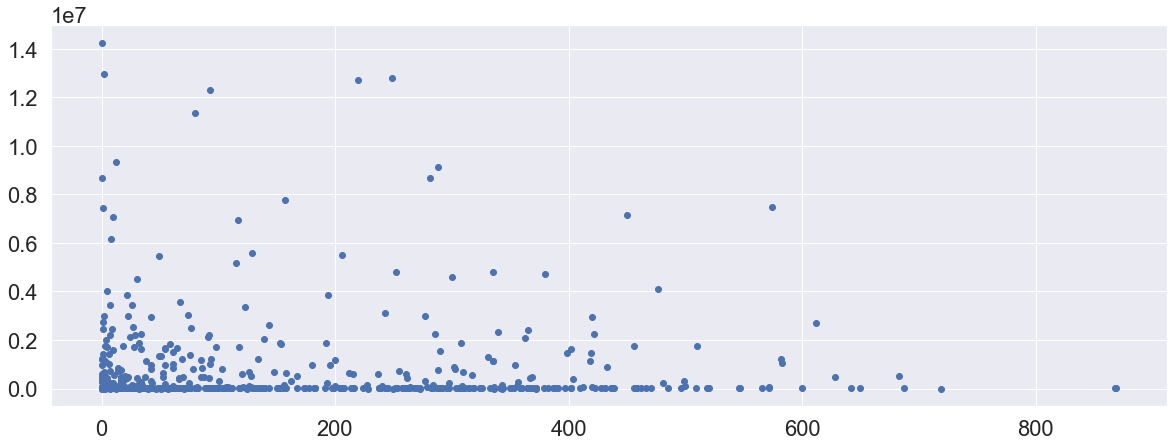

In [260]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))

plt.scatter(df_train_staff['num_staff'], df_train_time['box_off_num'])

plt.show()

In [262]:
# 함수 구현
def num_staff_set(x):
    if x < 82:
        return '소형'
    elif x < 264:
        return '중형'
    else:
        return '대형'

In [265]:
df_train_staff['num_staff_en'] = df_train_staff['num_staff'].apply(num_staff_set)

/var/folders/j_/fj1wv97j4b12z2k4j128hn5w0000gn/T/ipykernel_12503/2105379637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_staff['num_staff_en'] = df_train_staff['num_staff'].apply(num_staff_set)


In [266]:
df_train_staff

,num_staff,box_off_num,num_staff_en
0,91,23398,중형
1,387,7072501,대형
2,343,6959083,대형
3,20,217866,소형
4,251,483387,중형
...,...,...,...
595,510,1475091,대형
596,286,1716438,대형
597,123,2475,중형
598,431,2192525,대형


## num_actor
- 주연 배우 수

In [268]:
df_train[['num_actor','box_off_num']]

,num_actor,box_off_num
0,2,23398
1,3,7072501
2,4,6959083
3,6,217866
4,2,483387
...,...,...
595,7,1475091
596,6,1716438
597,4,2475
598,4,2192525


In [269]:
df_train['num_actor'].describe()

count   600
mean      4
std       2
min       0
25%       2
50%       3
75%       4
max      25
Name: num_actor, dtype: float64

- 주연 배우의 수는 대부분 2명 수준이므로 큰 의미를 가지지 않을 것으로 보인다.

## 결론
- 총 11개의 독립변수에 대해 알아보았다.

In [271]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
 12  title_length    600 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 61.1+ KB


# Preprocessing

### 분석에 사용할 컬럼만 선별

### Missing Values

### One Hot Encoding

# Modeling

# Prediction

In [ ]:
prediction = model.predict(test)

In [ ]:
# score

# Submission

In [ ]:
submission = pd.read_csv('data/submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [ ]:
# submission['box_off_num'] = prediction
# submission

In [ ]:
# timestr = time.strftime("%Y%m%d")

'20221221'

In [ ]:
# submission.to_csv('.csv',index = False)

In [ ]:
bb

Github Push